In [31]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("car_data.csv")

In [58]:
# Display the first few rows of the DataFrame
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3,5,27000,2,0,1,0
1,93,2013,4,9,43000,1,0,1,0
2,68,2017,7,9,6900,2,0,1,0
3,96,2011,2,4,5200,2,0,1,0
4,92,2014,4,6,42450,1,0,1,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [35]:
# Convert object and float columns to integers
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category').cat.codes
    elif df[column].dtype == 'float64':
        df[column] = df[column].astype('int64')


In [36]:
# Display updated DataFrame
print("Updated DataFrame:")
print(df.info())


Updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Car_Name       301 non-null    int8 
 1   Year           301 non-null    int64
 2   Selling_Price  301 non-null    int64
 3   Present_Price  301 non-null    int64
 4   Driven_kms     301 non-null    int64
 5   Fuel_Type      301 non-null    int8 
 6   Selling_type   301 non-null    int8 
 7   Transmission   301 non-null    int8 
 8   Owner          301 non-null    int64
dtypes: int64(5), int8(4)
memory usage: 13.1 KB
None


In [37]:
print(df.head())

   Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0        90  2014              3              5       27000          2   
1        93  2013              4              9       43000          1   
2        68  2017              7              9        6900          2   
3        96  2011              2              4        5200          2   
4        92  2014              4              6       42450          1   

   Selling_type  Transmission  Owner  
0             0             1      0  
1             0             1      0  
2             0             1      0  
3             0             1      0  
4             0             1      0  


In [38]:
# One-Hot Encoding using pandas
df = pd.get_dummies(df, drop_first=True)

In [39]:
# Selecting features and target variable
features = df.drop('Selling_Price', axis=1)
target = df['Selling_Price']

In [40]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [41]:
# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:

# Making predictions
y_pred = model.predict(X_test)

In [43]:
# Evaluating the model
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [44]:
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 1.9436410526290764
R^2 Score: 0.8676918449025046


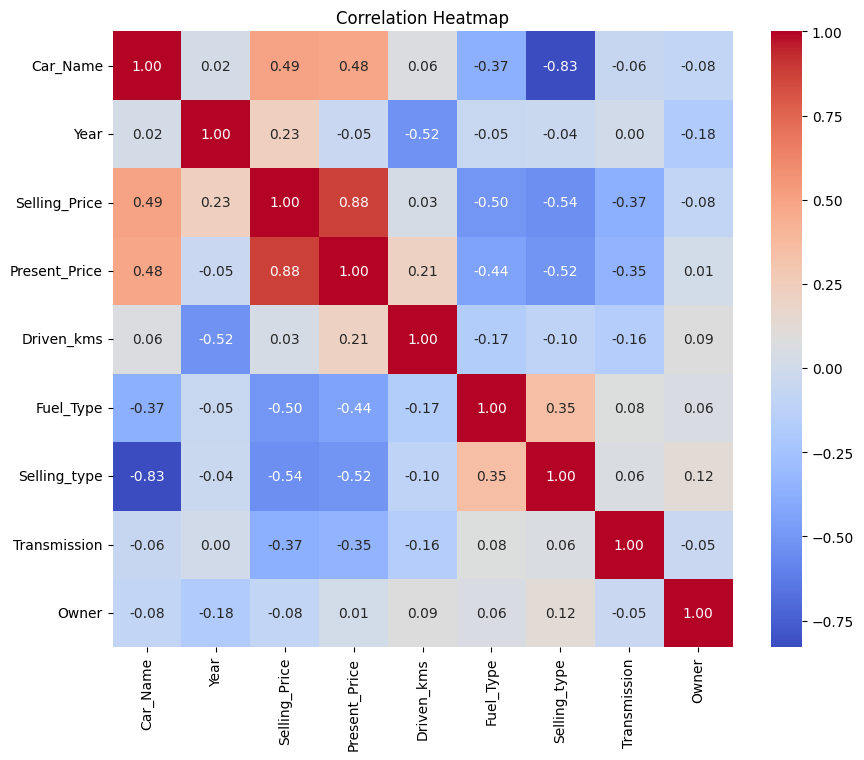

In [45]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

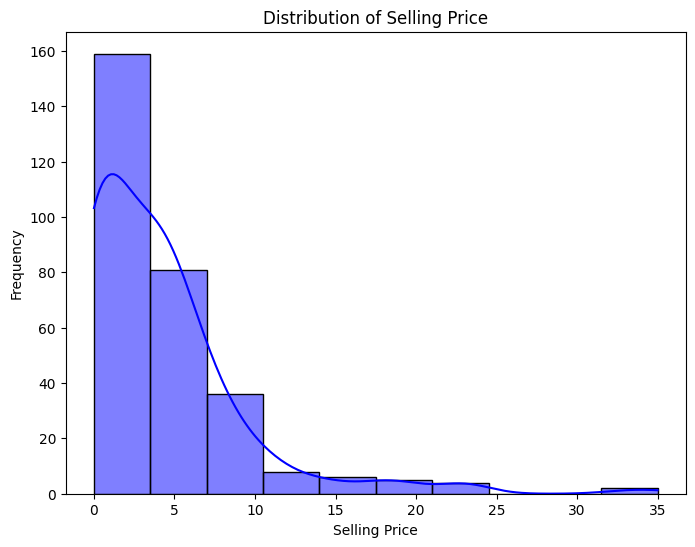

In [46]:
# Distribution of Selling Price
plt.figure(figsize=(8, 6))
sns.histplot(df['Selling_Price'], kde=True, color='blue', bins=10)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


C:\Users\imran\AppData\Local\Temp\ipykernel_8020\1212588366.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


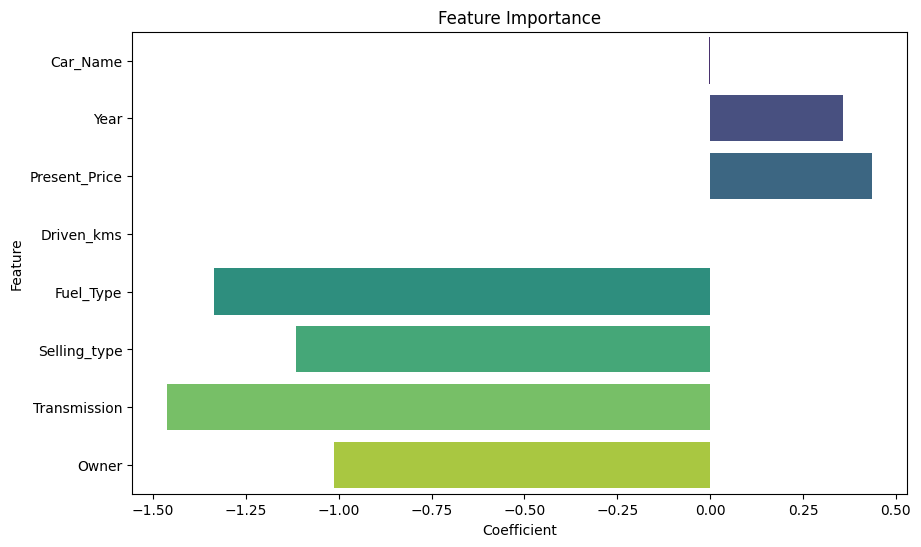

In [47]:
# Feature Importance (Coefficients)
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_})
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance')
plt.show()

C:\Users\imran\AppData\Local\Temp\ipykernel_8020\1508666926.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


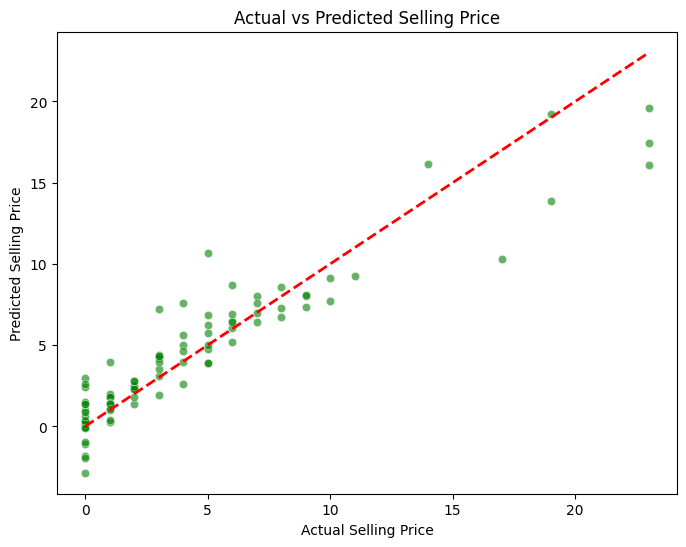

In [48]:
# Actual vs Predicted Selling Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

In [56]:
new_data = pd.DataFrame({
    'Year': [2014],
    'Present_Price': [6.87],
    'Driven_kms': [42450],
    'Fuel_Type': [1],       # Encoded value for 'Diesel'
    'Selling_type': [1],    # Encoded value for 'Dealer'
    'Transmission': [1],    # Encoded value for 'Manual'
    'Owner': [0]            # Number of previous owners
})

In [57]:
# Ensure the new data matches the features in the training data
new_data = pd.get_dummies(new_data, drop_first=True)
missing_cols = set(features.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0  # Add missing columns with default value 0

# Ensure the column order matches the training data
new_data = new_data[features.columns]

# Make a prediction
predicted_price = model.predict(new_data)

# Output the predicted price
print(f"The predicted selling price for the new car data is: {predicted_price[0]:.2f}")

The predicted selling price for the new car data is: 4.60
